<a href="https://colab.research.google.com/github/scalabrinig/cdProjetoAplicadoIV/blob/master/projeto/cd_projeto_aplicado_IV_entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/01**


# **Entrega 3**

---

# **Título do Projeto**
# Análise Temporal do Impacto da COVID-19 no Estado de São Paulo

In [6]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)

Aluno1 = 'Camila Vieira, 10414794' #@param {type:"string"}
Aluno2 = 'Gabriel Schonenberger, 10415150' #@param {type:"string"}
Aluno3 = 'Glayton de Paula, 10415099' #@param {type:"string"}
Aluno4 = 'João Cunha, 10415459' #@param {type:"string"}


# **Introdução**

A pandemia de COVID-19, causada pelo vírus SARS-CoV-2, provocou uma crise sanitária de escala global, afetando profundamente os sistemas de saúde, a economia e a organização social em praticamente todos os países (WHO, 2020). Identificada inicialmente em dezembro de 2019, na cidade de Wuhan, China, a rápida disseminação do vírus levou a Organização Mundial da Saúde (OMS) a declarar emergência de saúde pública internacional em janeiro de 2020, e posteriormente, a classificar a COVID-19 como uma pandemia em março do mesmo ano (PAHO, 2020).

No Brasil, o primeiro caso foi confirmado no estado de São Paulo, em 26 de fevereiro de 2020 (FIOCRUZ, 2021). Como centro mais populoso e economicamente ativo do país, São Paulo rapidamente se tornou o epicentro da pandemia no território nacional. A elevada densidade demográfica e a intensa mobilidade urbana favoreceram a propagação do vírus, resultando em altos índices de infecção e mortalidade. Em resposta, o estado implementou uma série de medidas emergenciais, incluindo quarentenas, restrições de mobilidade, fechamento de estabelecimentos comerciais e, posteriormente, campanhas de vacinação em larga escala (SEADE, 2021).

Neste contexto, a análise de séries temporais epidemiológicas surge como ferramenta essencial para compreender a evolução da doença, identificar padrões de transmissão, avaliar a eficácia das políticas públicas implementadas e subsidiar decisões futuras. O uso de dados estruturados e atualizados permite não apenas um acompanhamento em tempo real da crise sanitária, mas também análises retrospectivas que ajudam a entender os impactos das ações governamentais.

Este estudo tem como objetivo geral analisar a evolução temporal da pandemia de COVID-19 no estado de São Paulo, por meio da investigação de padrões de transmissão, variações na taxa de incidência e efeitos das medidas de contenção e vacinação ao longo do tempo.

Para atingir esse objetivo, foram definidos os seguintes objetivos específicos:

Explorar a série temporal dos casos confirmados e óbitos diários por COVID-19 no estado de São Paulo;
Avaliar a taxa de incidência e sua evolução ao longo do tempo;
Investigar possíveis mudanças nos padrões após a implementação de medidas de restrição e após o início da vacinação;
Verificar correlações entre variáveis populacionais e indicadores epidemiológicos.
As análises serão conduzidas com base na base de dados “Casos e Óbitos de COVID-19 no Brasil”, disponibilizada pela plataforma colaborativa Brasil.io. Essa base reúne informações oficiais divulgadas por secretarias estaduais e municipais de saúde, sendo amplamente utilizada por pesquisadores e órgãos públicos.

A base de dados contém aproximadamente 1,6 milhão de observações, abrangendo todos os municípios brasileiros desde o início da pandemia até o presente momento (dados atualizados até janeiro de 2025). No recorte utilizado neste estudo — focado no estado de São Paulo — são consideradas as entradas entre fevereiro de 2020 e dezembro de 2024.

A estrutura da base é tabular, e os principais atributos estão organizados da seguinte forma:

Data (YYYY-MM-DD) – tipo categórico ordinal (representa o dia da notificação);
Estado, município, código IBGE – atributos categóricos nominais (identificação geográfica);
Casos confirmados (novos e acumulados) – atributos numéricos inteiros;
Óbitos (novos e acumulados) – atributos numéricos inteiros;
Taxa de incidência (casos por 100 mil habitantes) – atributo numérico contínuo;
População estimada (TCU 2019) – atributo numérico inteiro;
Fonte dos dados – atributo categórico nominal, descrevendo a origem da informação (boletins estaduais/municipais).
A coleta dos dados ocorre de forma diária, com informações extraídas diretamente de boletins epidemiológicos das secretarias de saúde estaduais e municipais, sendo posteriormente organizadas e padronizadas pela equipe da Brasil.io. Os dados são disponibilizados em formato CSV e também acessíveis por API, o que possibilita sua integração com ferramentas de análise e visualização.

A escolha dessa base de dados se justifica por sua abrangência nacional, atualização frequente, granularidade por município e transparência metodológica. Ao concentrar a análise no estado de São Paulo, este estudo pretende fornecer uma visão analítica da evolução da pandemia em uma das regiões mais afetadas do país.

# **Referencial Teórico**

A análise exploratória de dados (AED) é uma etapa fundamental no processo de ciência de dados, visando compreender a estrutura e os padrões dos dados por meio de técnicas estatísticas e visualizações. No contexto de séries temporais, a AED envolve ajustes de escala, identificação de tipos de dados e tratamento de valores ausentes, preparando os dados para análises subsequentes. Islam (2024) destaca a importância da AED na identificação de tendências e padrões ocultos em dados temporais.

Séries temporais são sequências de observações coletadas em intervalos de tempo regulares, essenciais para modelar e prever comportamentos futuros em diversas áreas, como finanças, economia e epidemiologia. Componentes fundamentais de uma série temporal incluem tendência (movimento de longo prazo), sazonalidade (padrões que se repetem em intervalos regulares), ciclos (flutuações não sazonais) e componentes irregulares (variações aleatórias). A decomposição de séries temporais permite separar esses componentes, facilitando a compreensão e modelagem dos dados. Islam (2024) fornece uma visão abrangente sobre a decomposição de séries temporais e suas aplicações.

Diversos trabalhos têm explorado a análise e previsão de séries temporais aplicadas a dados da COVID-19. O projeto desenvolvido por Santos (2021) utilizou a biblioteca Facebook Prophet para modelagem e previsão de casos e óbitos de COVID-19 em Santo André - SP. O Prophet apresenta a vantagem de ser um modelo automatizado e de fácil configuração, permitindo lidar com séries temporais com fortes componentes sazonais e tendência. No entanto, sua desvantagem é a menor flexibilidade na escolha de parâmetros, o que pode limitar a capacidade de ajuste fino do modelo.

Outro estudo, conduzido por Hanada (2021), focou na análise de séries temporais da COVID-19 no Brasil durante 2020 e início de 2021, utilizando modelos ARIMA e SARIMA. A principal vantagem desses modelos é sua robustez para dados estacionários e a capacidade de lidar com sazonalidade ao incorporar termos sazonais no modelo SARIMA. No entanto, esses modelos exigem uma etapa mais complexa de identificação e ajuste de parâmetros, o que pode torná-los menos acessíveis para usuários sem experiência avançada em modelagem estatística.

Além disso, Almeida (2021) analisou os cenários da pandemia no Amazonas, aplicando também a biblioteca Prophet. Como mencionado anteriormente, a vantagem desse modelo está na sua praticidade, mas uma limitação relevante é sua suposição de que os padrões sazonais e de tendência permanecerão consistentes ao longo do tempo, o que pode ser um problema em séries temporais com mudanças estruturais significativas.

Esses estudos demonstram que a escolha do modelo depende das características específicas dos dados e dos objetivos da análise. Enquanto o Prophet é recomendado para aplicações que exigem rapidez e facilidade de implementação, modelos como ARIMA e SARIMA oferecem maior precisão para dados estacionários, embora exijam um processo mais detalhado de parametrização.



# **Diagrama de Solução**

1. Coleta e Pré-processamento dos Dados Obter os dados: Baixar a base de dados da COVID-19 do Brasil.io (casos, óbitos e taxa de vacinação).
Filtragem e estruturação: Selecionar apenas os dados relevantes (por estado ou Brasil inteiro) e organizá-los por data.

  Tratamento de inconsistências: Identificar valores faltantes, outliers e possíveis erros nos registros.

2. Análise Exploratória de Séries Temporais (AED) Visualização da evolução da pandemia: Criar gráficos de linhas para casos e óbitos ao longo do tempo.
Cálculo de variações: Analisar tendências de crescimento e quedas nas séries temporais.

  Identificação de padrões: Avaliar sazonalidade e possíveis ciclos de aumento e redução dos casos.

3. Associação com Eventos e Notícias Levantamento de marcos históricos: Identificar datas-chave como decretos de lockdown, novas variantes e início da vacinação.
Sobreposição de eventos nos gráficos: Adicionar anotações nos gráficos indicando os principais eventos e suas datas correspondentes.

  Comparação entre regiões: Analisar diferenças entre estados e sua correlação com medidas governamentais.

4. Decomposição e Análises Temporais Específicas Separação dos componentes da série temporal: Desmembrar tendência, sazonalidade e flutuações aleatórias para melhor compreensão dos padrões.
Análise de impacto de políticas públicas: Relacionar mudanças nos dados com medidas restritivas e campanhas de vacinação.

5. Geração dos Gráficos e Relatório Final Criação dos gráficos via script Python: Utilizar bibliotecas como Matplotlib e Seaborn para gerar gráficos e salvá-los como imagens.
Inclusão dos gráficos no relatório: Integrar as figuras no documento de análise, detalhando os achados de cada visualização.

  Discussão dos resultados: Interpretar os padrões observados, destacando a relação entre a evolução da pandemia e os eventos históricos.

# **EDA e Pré-processamento dos dados**

Exploração e análise dos dados. Discussão e análise dos dados empregados (qualidade, limitações, simplicações ou recortes adotados etc.). Tarefas de preparação dos dados (transformações, compactação e encodes, junções de dados etc.).

In [33]:
## Importando bibliotecas necessárias
import pandas as pd
import optuna as optuna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import itertools

In [8]:
## Carregando os dados
df = pd.read_csv('caso_full.csv')

# Exibindo informações iniciais
df.head()        # Primeiras linhas
df.info()        # Estrutura e tipos
df.describe()    # Estatísticas descritivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.840002e+06,3.853648e+06,3.840002e+06,3.840002e+06,3.853648e+06,3.824482e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06
mean,3.228321e+06,2.021052e+05,8.116488e+04,8.054619e+04,4.777532e+03,5.984968e+03,2.650386e-02,1.296616e+02,3.442507e+02,1.385716e+01,3.307339e-01
std,1.009499e+06,5.755437e+01,9.057809e+05,8.992380e+05,6.180363e+04,5.358505e+03,4.975375e-02,1.901344e+03,1.992017e+02,2.606627e+02,6.263980e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-5.942900e+04,-4.070000e+02
25%,2.509107e+06,2.020440e+05,5.602000e+03,5.603000e+03,1.420000e+02,1.571626e+03,1.140000e-02,3.000000e+00,1.720000e+02,0.000000e+00,0.000000e+00
50%,3.144508e+06,2.021160e+05,1.219500e+04,1.213900e+04,4.800000e+02,4.675325e+03,1.970000e-02,9.000000e+00,3.440000e+02,0.000000e+00,0.000000e+00
75%,4.117297e+06,2.021400e+05,2.689900e+04,2.670000e+04,1.395000e+03,9.208211e+03,2.990000e-02,3.000000e+01,5.150000e+02,2.000000e+00,0.000000e+00
max,5.300108e+06,2.022130e+05,4.628933e+07,4.591905e+07,5.232374e+06,9.048099e+05,1.000000e+00,1.671100e+05,7.620000e+02,1.052000e+05,1.389000e+03


In [9]:
# Verificando colunas nulas
df.isnull().sum()

,0
city,20119
city_ibge_code,13646
date,0
epidemiological_week,0
estimated_population,13646
estimated_population_2019,13646
is_last,0
is_repeated,0
last_available_confirmed,0
last_available_confirmed_per_100k_inhabitants,29166


In [10]:
# Tratando o campo de data pra que esteja no formato correto
df['date'] = pd.to_datetime(df['date'])

# Como nossa análise vai focar em estados, especialmente no estado de São Paulo, vamos criar também um dataset apenas com dados estaduais
df_estados = df[df['place_type'] == 'state'].copy()

# Ordenando por data
df_estados.sort_values(by='date', inplace=True)

# Verificando e tratando duplicatas
df_estados.drop_duplicates(inplace=True)

# **Média Móvel de Novos Casos de COVID-19 no Brasil**

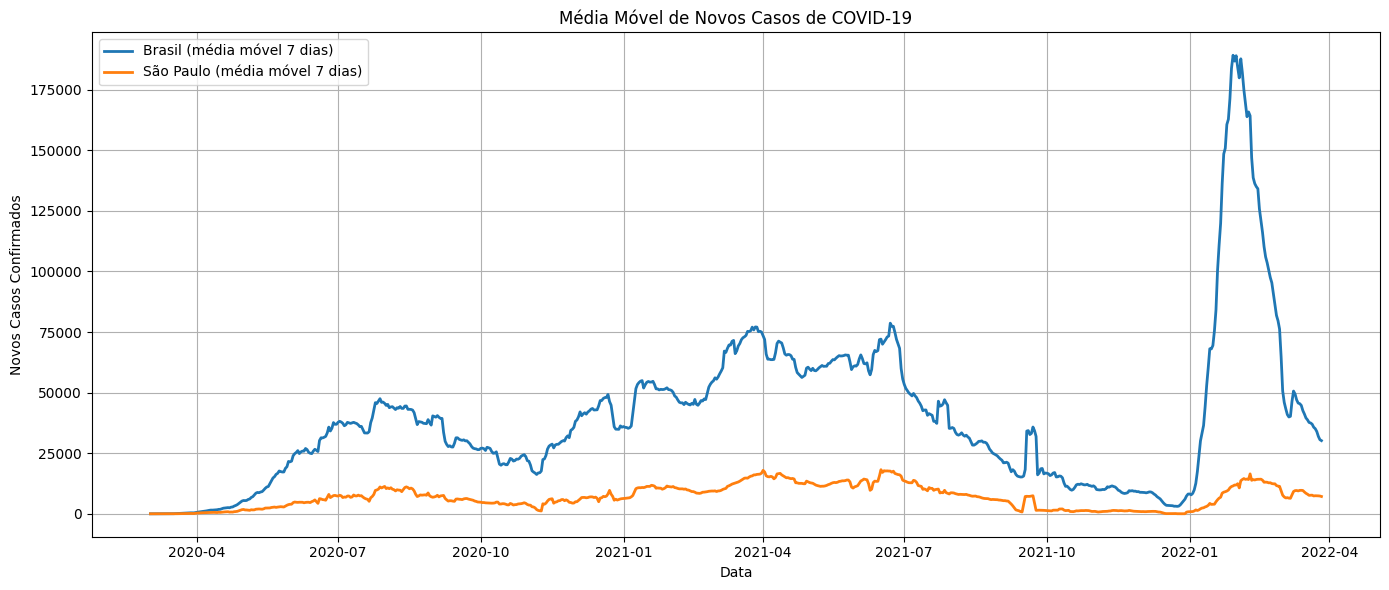

In [11]:
# Calcula média diária por data (Brasil)
brasil_casos = df_estados.groupby("date")["new_confirmed"].sum().rolling(7).mean().reset_index(name="media_brasil")

# Filtra o estado de São Paulo
sp_casos = df_estados[df_estados["state"] == "SP"].groupby("date")["new_confirmed"].sum().rolling(7).mean().reset_index(name="media_sp")

# Junta as duas séries pelo campo "date"
df_final = pd.merge(brasil_casos, sp_casos, on="date", how="inner")

# 🎨 Plot
plt.figure(figsize=(14, 6))
plt.plot(df_final["date"], df_final["media_brasil"], label="Brasil (média móvel 7 dias)", linewidth=2)
plt.plot(df_final["date"], df_final["media_sp"], label="São Paulo (média móvel 7 dias)", linewidth=2)
plt.title("Média Móvel de Novos Casos de COVID-19")
plt.xlabel("Data")
plt.ylabel("Novos Casos Confirmados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Média Móvel de Mortes de COVID-19 no Brasil**

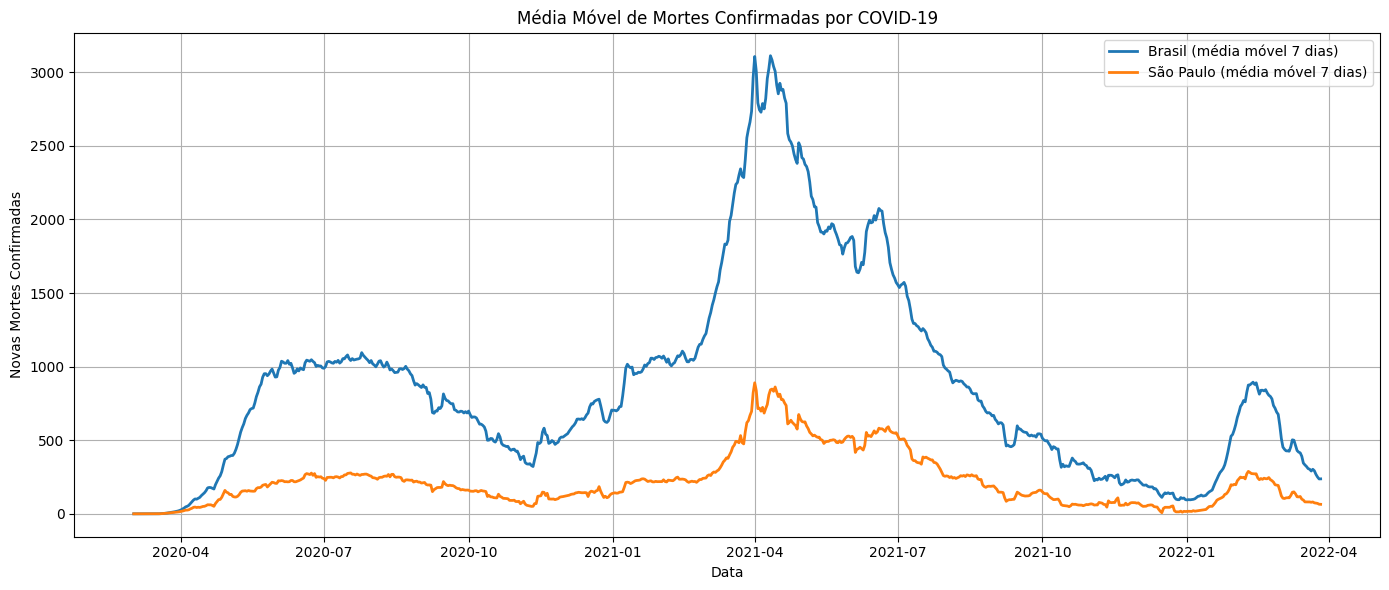

In [12]:
# Brasil: somar todas as mortes por data e aplicar média móvel
brasil_mortes = df_estados.groupby("date")["new_deaths"].sum().rolling(7).mean().reset_index(name="media_brasil_mortes")

# São Paulo: filtrar SP e aplicar média móvel
sp_mortes = df_estados[df_estados["state"] == "SP"].groupby("date")["new_deaths"].sum().rolling(7).mean().reset_index(name="media_sp_mortes")

# Juntar Brasil e SP pelo campo "date"
df_mortes = pd.merge(brasil_mortes, sp_mortes, on="date", how="inner")

# 🎨 Plotar
plt.figure(figsize=(14, 6))
plt.plot(df_mortes["date"], df_mortes["media_brasil_mortes"], label="Brasil (média móvel 7 dias)", linewidth=2)
plt.plot(df_mortes["date"], df_mortes["media_sp_mortes"], label="São Paulo (média móvel 7 dias)", linewidth=2)
plt.title("Média Móvel de Mortes Confirmadas por COVID-19")
plt.xlabel("Data")
plt.ylabel("Novas Mortes Confirmadas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Média Móvel de Novos Casos e Mortes por COVID-19 no Brasil**

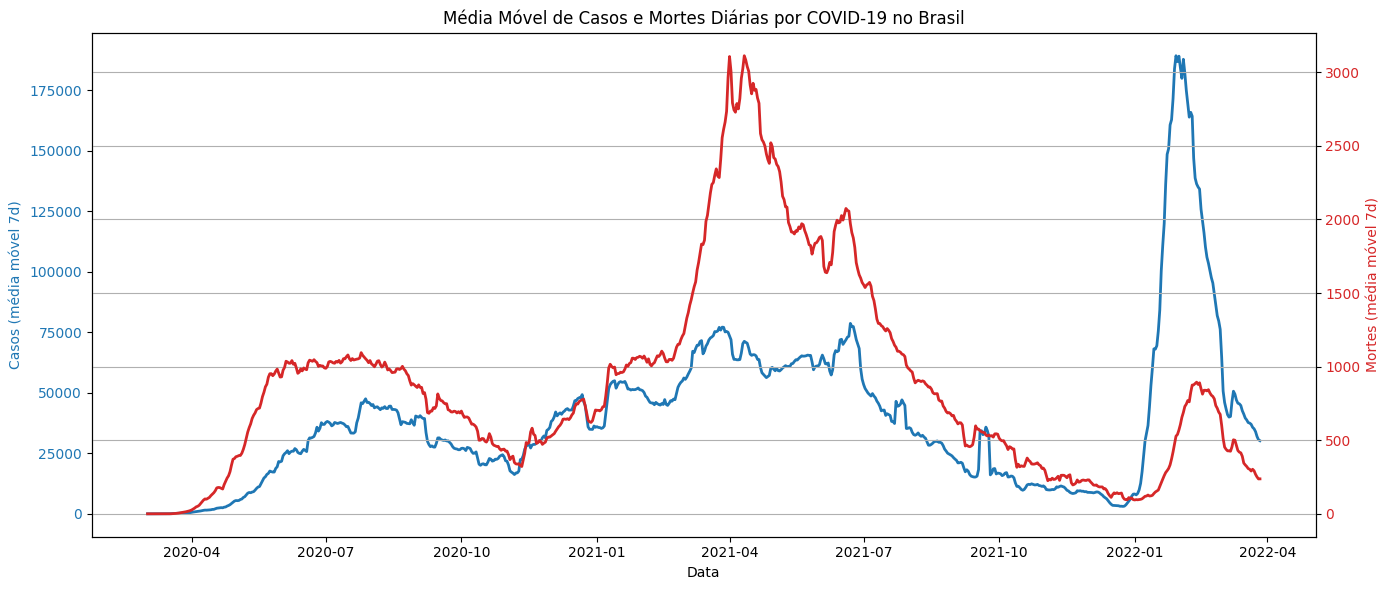

In [13]:
df_brasil = df_estados.groupby("date")[["new_confirmed", "new_deaths"]].sum().sort_index()

# Aplicar média móvel de 7 dias
df_brasil["media_casos"] = df_brasil["new_confirmed"].rolling(7).mean()
df_brasil["media_mortes"] = df_brasil["new_deaths"].rolling(7).mean()

# Resetar índice para facilitar o uso no plot
df_brasil = df_brasil.reset_index()

# Criar gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Casos (eixo primário)
color = "tab:blue"
ax1.set_xlabel("Data")
ax1.set_ylabel("Casos (média móvel 7d)", color=color)
ax1.plot(df_brasil["date"], df_brasil["media_casos"], color=color, linewidth=2)
ax1.tick_params(axis="y", labelcolor=color)

# Mortes (eixo secundário)
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Mortes (média móvel 7d)", color=color)
ax2.plot(df_brasil["date"], df_brasil["media_mortes"], color=color, linewidth=2)
ax2.tick_params(axis="y", labelcolor=color)

# Título e layout
plt.title("Média Móvel de Casos e Mortes Diárias por COVID-19 no Brasil")
plt.grid(True)
fig.tight_layout()
plt.show()

# **Média Móvel de Novos Casos e Mortes por COVID-19 no Estado de São Paulo**

<ipython-input-14-0f066425dbe1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sp = df_estados[


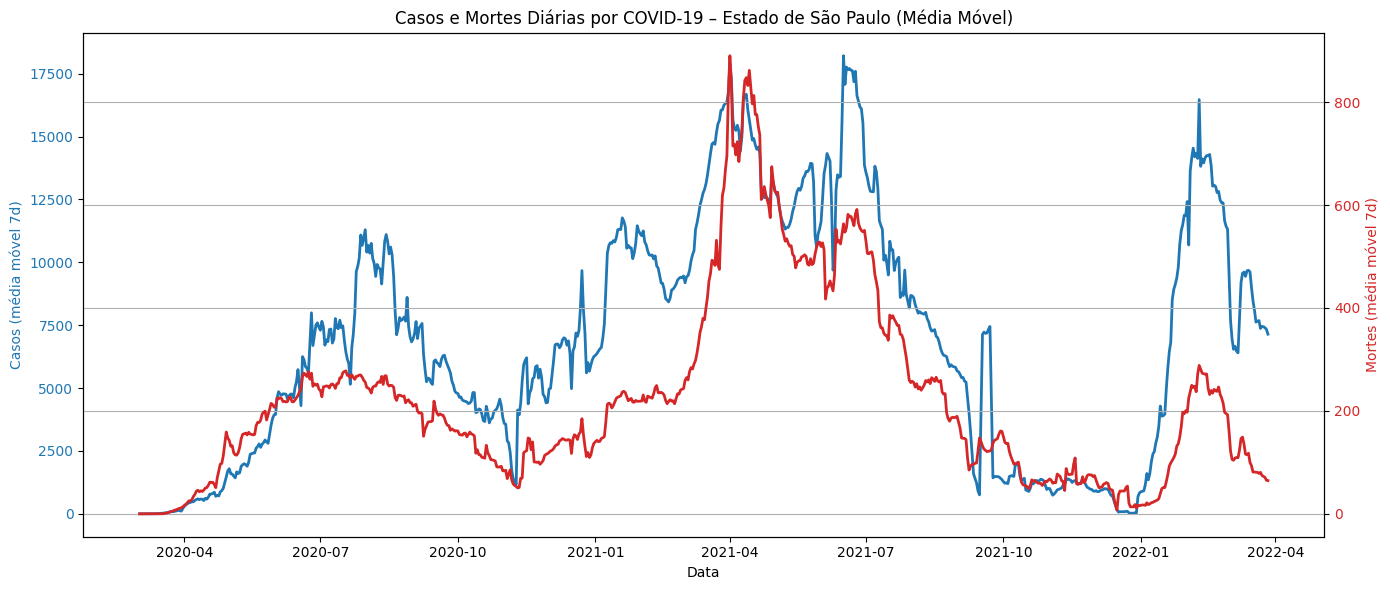

In [14]:
# Filtrar apenas estado de São Paulo
df_sp = df_estados[
    (df["state"] == "SP")
].copy()

# Agrupa por data e calcula média móvel
df_sp = df_sp.groupby("date")[["new_confirmed", "new_deaths"]].sum().rolling(7).mean().reset_index()

# Cria o gráfico com dois eixos
fig, ax1 = plt.subplots(figsize=(14, 6))

# Casos - eixo primário
color = "tab:blue"
ax1.set_xlabel("Data")
ax1.set_ylabel("Casos (média móvel 7d)", color=color)
ax1.plot(df_sp["date"], df_sp["new_confirmed"], color=color, linewidth=2)
ax1.tick_params(axis="y", labelcolor=color)

# Mortes - eixo secundário
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Mortes (média móvel 7d)", color=color)
ax2.plot(df_sp["date"], df_sp["new_deaths"], color=color, linewidth=2)
ax2.tick_params(axis="y", labelcolor=color)

# Título e layout final
plt.title("Casos e Mortes Diárias por COVID-19 – Estado de São Paulo (Média Móvel)")
plt.grid(True)
fig.tight_layout()
plt.show()

Os quatro gráficos juntos ajudam a contar a história da pandemia de COVID-19 no Brasil e no estado de São Paulo, mostrando como os casos e as mortes evoluíram ao longo do tempo. A gente consegue ver, por exemplo, como São Paulo acompanha bem de perto o comportamento da curva nacional — não só porque é o estado mais populoso, mas também porque teve estrutura para registrar melhor os dados desde o começo.

O primeiro gráfico mostra a média móvel de casos no Brasil e em São Paulo. Nele, dá pra ver três grandes momentos da pandemia: a primeira onda, que começa lá em abril de 2020 e vai até mais ou menos agosto, com crescimento lento, mas constante. Depois, no final de 2020 e início de 2021, começa a segunda onda — muito mais intensa. E finalmente, no começo de 2022, aparece o maior pico de todos, causado pela variante Ômicron. Já o segundo gráfico mostra os casos e as mortes no Brasil juntos, e isso ajuda a ver como os picos de mortes sempre vêm logo depois dos picos de casos, com algumas semanas de atraso.

O terceiro gráfico compara as mortes no Brasil e em São Paulo. Ele mostra que, mesmo com o número absoluto de mortes sendo bem maior no país, São Paulo teve uma curva bem parecida, só que com valores menores e um pouco mais suaves. E o quarto gráfico faz esse mesmo tipo de comparação, mas focando só em São Paulo — juntando os casos e as mortes na mesma visualização, com escalas diferentes. Ele reforça aquela ideia de que, nas primeiras ondas, o número de mortes acompanhava o de casos bem de perto. Mas depois, especialmente com o avanço da vacinação, essa relação foi mudando.

Dá pra ver claramente que a vacinação fez toda a diferença. Na segunda onda, por exemplo, o Brasil chegou a ter mais de 3.000 mortes por dia em média. Foi o período mais crítico, com hospitais colapsando, oxigênio acabando em algumas regiões, e a variante Gama se espalhando rápido. A vacinação começou em janeiro de 2021, mas demorou um pouco pra fazer efeito, porque no início só um grupo pequeno da população estava sendo vacinado. A partir do segundo semestre, com mais gente vacinada com duas doses, os casos até subiam, mas as mortes começaram a cair — e essa dissociação ficou ainda mais clara na terceira onda, com a chegada da Ômicron.

Apesar de ser super transmissível, a Ômicron não causou o mesmo estrago das variantes anteriores. O gráfico mostra o maior pico de casos da pandemia, mas as mortes não subiram na mesma proporção. Isso é um reflexo direto da vacinação: muita gente já estava imunizada, inclusive com dose de reforço, e isso fez com que os casos graves fossem muito menores.

Além dos efeitos das variantes e das vacinas, os gráficos também mostram como a pandemia foi afetada por decisões políticas e comportamentos da população. Feriados, eleições, festas de fim de ano e períodos de relaxamento nas medidas de prevenção sempre foram seguidos por aumento de casos. Por exemplo, logo após o Natal e o Réveillon de 2020/2021, houve uma aceleração significativa no número de infecções, que acabou alimentando a segunda onda no início de 2021. Da mesma forma, o feriado de Carnaval em fevereiro de 2021, mesmo sem blocos oficiais, resultou em muitas aglomerações e contribuiu para o agravamento da situação. Outro exemplo foi o feriado prolongado de 7 de setembro de 2021, quando diversos atos públicos e viagens foram registrados, e logo em seguida observou-se um repique de casos em várias regiões. Por outro lado, campanhas de vacinação em larga escala e momentos de maior restrição de circulação — como o endurecimento das medidas em março de 2021 em São Paulo — ajudaram a derrubar os números nas semanas seguintes.

Em resumo, os gráficos mostram não só os altos e baixos da pandemia, mas também como ela foi sendo moldada por diferentes fatores: biológicos, sociais, políticos e científicos. Eles ajudam a entender que, mesmo diante de uma crise tão grande, ações coordenadas — como o avanço da vacinação — fazem toda a diferença para salvar vidas.

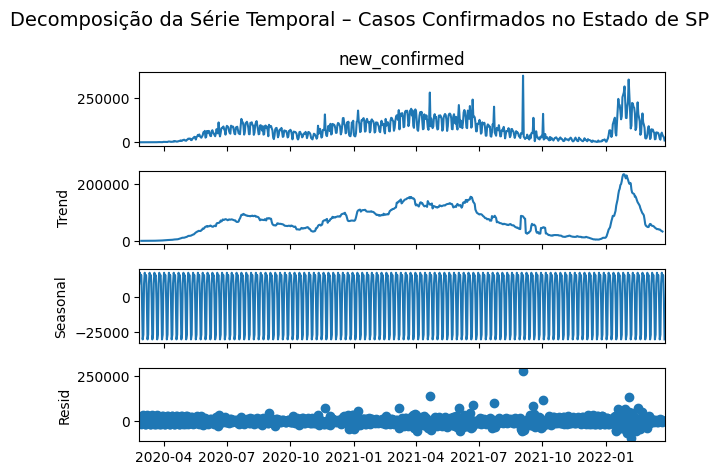

In [15]:
df_decomposition = df.groupby("date")["new_confirmed"].sum()
df_decomposition = df_decomposition.asfreq("D")  # frequência diária
df_decomposition = df_decomposition.fillna(0)    # evitar valores nulos

result = seasonal_decompose(df_decomposition, model='additive', period=7)

# Plotar os componentes
result.plot()
plt.suptitle("Decomposição da Série Temporal – Casos Confirmados no Estado de SP", fontsize=14)
plt.tight_layout()
plt.show()

Este gráfico mostra a decomposição da série de casos confirmados de COVID-19 no estado de São Paulo ao longo do tempo, dividindo-a em quatro componentes: série original, tendência, sazonalidade e resíduo. A linha da série original evidencia os principais picos da pandemia, com destaque para março de 2021 e janeiro de 2022, que coincidem com as ondas das variantes Gama e Ômicron.

A tendência revela o crescimento contínuo até o início de 2021, seguido de um platô e posterior queda com o avanço da vacinação. O aumento em janeiro de 2022 reflete o impacto da Ômicron, mas a queda logo em seguida indica o efeito da imunização.

A componente sazonal mostra um padrão semanal claro, com menos registros aos domingos e mais concentrações no início da semana, refletindo a dinâmica dos sistemas de notificação. Já os resíduos capturam eventos fora do padrão esperado, como correções de dados ou atrasos nos registros, visíveis em picos isolados ao longo da série. A decomposição ajuda a entender como a pandemia foi influenciada tanto por fatores estruturais quanto por ruídos operacionais na coleta de dados.

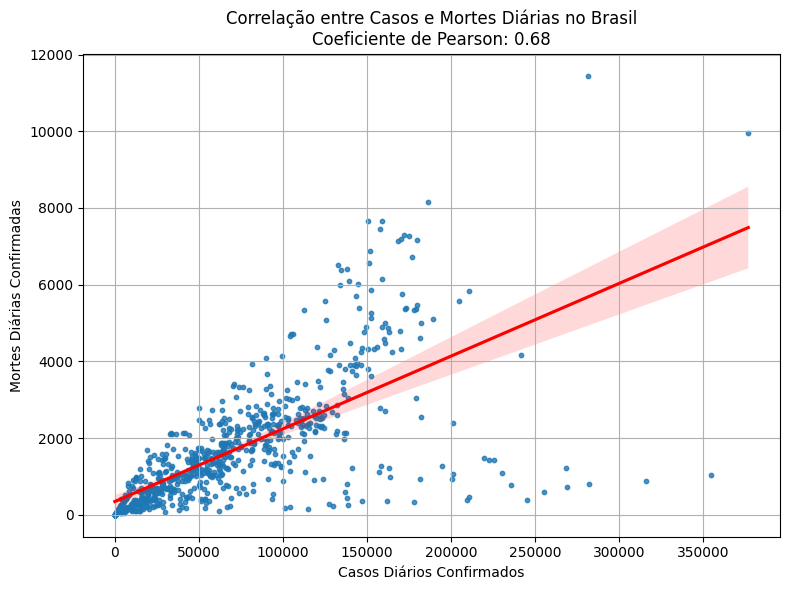

In [16]:
# Dados agrupados por data
df_brasil = df.groupby("date")[["new_confirmed", "new_deaths"]].sum().dropna()

# Calcular correlação de Pearson
corr, _ = pearsonr(df_brasil["new_confirmed"], df_brasil["new_deaths"])

# Plot com linha de tendência
plt.figure(figsize=(8, 6))
sns.regplot(x="new_confirmed", y="new_deaths", data=df_brasil, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title(f"Correlação entre Casos e Mortes Diárias no Brasil\nCoeficiente de Pearson: {corr:.2f}")
plt.xlabel("Casos Diários Confirmados")
plt.ylabel("Mortes Diárias Confirmadas")
plt.grid(True)
plt.tight_layout()
plt.show()

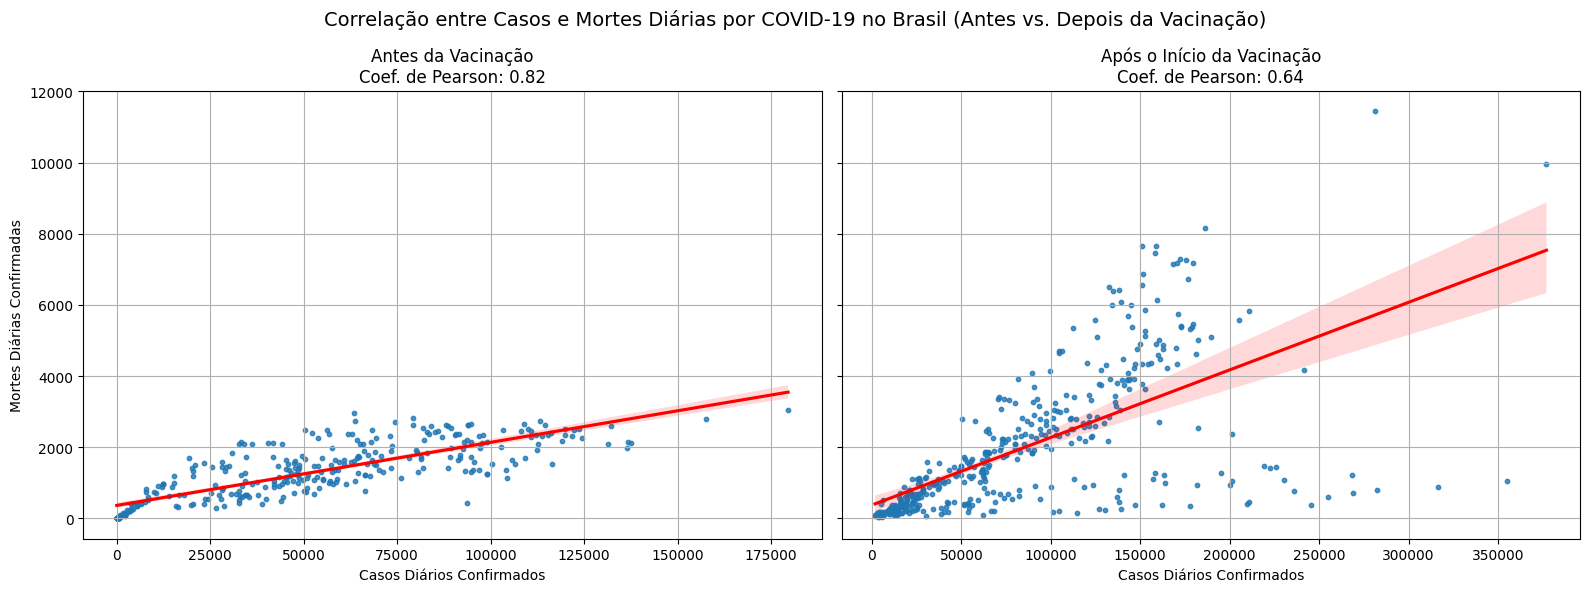

In [17]:
# Definir data de corte da vacinação no Brasil
inicio_vacinacao = pd.to_datetime("2021-01-17")

# Separar períodos
pre_vac = df_brasil[df_brasil.index < inicio_vacinacao]
post_vac = df_brasil[df_brasil.index >= inicio_vacinacao]

# Calcular correlações
corr_pre, _ = pearsonr(pre_vac["new_confirmed"], pre_vac["new_deaths"])
corr_post, _ = pearsonr(post_vac["new_confirmed"], post_vac["new_deaths"])

# Criar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico Pré-Vacinação
sns.regplot(x="new_confirmed", y="new_deaths", data=pre_vac, ax=axs[0],
            scatter_kws={"s": 10}, line_kws={"color": "red"})
axs[0].set_title(f"Antes da Vacinação\nCoef. de Pearson: {corr_pre:.2f}")
axs[0].set_xlabel("Casos Diários Confirmados")
axs[0].set_ylabel("Mortes Diárias Confirmadas")
axs[0].grid(True)

# Gráfico Pós-Vacinação
sns.regplot(x="new_confirmed", y="new_deaths", data=post_vac, ax=axs[1],
            scatter_kws={"s": 10}, line_kws={"color": "red"})
axs[1].set_title(f"Após o Início da Vacinação\nCoef. de Pearson: {corr_post:.2f}")
axs[1].set_xlabel("Casos Diários Confirmados")
axs[1].set_ylabel("")  # já está no gráfico da esquerda
axs[1].grid(True)

plt.suptitle("Correlação entre Casos e Mortes Diárias por COVID-19 no Brasil (Antes vs. Depois da Vacinação)", fontsize=14)
plt.tight_layout()
plt.show()

Este gráfico compara a correlação entre casos e mortes diárias por COVID-19 no Brasil antes e depois do início da vacinação, com base na média móvel de 7 dias. O lado esquerdo mostra o período pré-vacinação, e o lado direito, o período posterior ao início da campanha vacinal, que começou oficialmente em janeiro de 2021. A mudança entre os dois períodos é bastante clara e reforça o impacto da vacinação na relação entre infecções e desfechos graves.

Antes da vacinação, o gráfico mostra uma correlação muito forte entre o número de casos confirmados e o número de mortes diárias, com um coeficiente de Pearson de 0.82. Isso significa que, nesse período, à medida que o número de casos aumentava, o número de mortes crescia de forma bastante proporcional. A linha de tendência e a concentração dos pontos confirmam essa associação direta. Isso reflete um cenário em que o sistema de saúde ainda não tinha ferramentas eficazes para reduzir a letalidade do vírus, e a população em geral estava vulnerável, principalmente os grupos de risco.

Já no período após o início da vacinação, a correlação entre casos e mortes cai significativamente, com o coeficiente de Pearson reduzido para 0.64. Embora ainda exista uma relação entre infecção e óbito, ela se torna menos intensa e mais dispersa. Isso se explica, principalmente, pelo avanço da imunização, que reduziu drasticamente o número de mortes mesmo quando os casos voltaram a subir — como aconteceu durante a onda causada pela variante Ômicron. A vacinação em massa, especialmente com a aplicação das doses de reforço em idosos e imunossuprimidos, foi fundamental para essa dissociação entre número de infectados e mortalidade.

O gráfico evidencia que, apesar de a COVID-19 continuar se espalhando após o início da vacinação, os desfechos passaram a ser menos graves. A linha de tendência mais horizontal e a maior dispersão de pontos no segundo painel mostram que muitos dias com altos números de casos não resultaram em altos números de mortes, como teria ocorrido no período anterior. Em resumo, a comparação entre os dois períodos reforça, com dados concretos, o papel da vacinação na redução da letalidade da COVID-19 no Brasil.

# **Modelo base**

Para entender a dinâmica da pandemia e antecipar seus movimentos, desenvolvemos um modelo de previsão baseado em SARIMA (AutoRegressive Integrated Moving Average com componente sazonal). Utilizando dados históricos de casos confirmados no estado de São Paulo, o modelo foi ajustado para capturar tanto as tendências de longo prazo quanto os padrões semanais de notificação. A transformação logarítmica foi aplicada para estabilizar a variabilidade da série, e diferentes combinações de hiperparâmetros foram testadas até encontrar a configuração mais adequada com base no menor AIC. O modelo final demonstrou bom desempenho na previsão de curto prazo, oferecendo uma ferramenta útil para simular cenários e apoiar decisões estratégicas em saúde pública.

In [26]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

dados_sp = df_estados.query('state == "SP"')
# Número total de registros
n_total = len(dados_sp)

# Usar os últimos 20% como teste
n_test = int(n_total * 0.2)    # número de linhas de teste
n_train = n_total - n_test     # número de linhas de treino

# Separar treino e teste
df_train['ds'] = dados_sp['date'][:n_train]
df_train['y'] = dados_sp['new_confirmed'][:n_train]

df_test['ds'] = dados_sp['date'][n_train:]
df_test['y'] = dados_sp['new_confirmed'][n_train:]

# Definir o índice como data
df_train = df_train.set_index("ds")
df_test = df_test.set_index("ds")

In [24]:
warnings.filterwarnings("ignore")  # silencia warnings de modelos inválidos

# Aplicar log1p para estabilizar variância
df_train['y_log'] = np.log1p(df_train['y'])

# Parâmetros a testar
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 7  # semanal

# Lista de todas as combinações possíveis
param_grid = list(itertools.product(p, d, q, P, D, Q))

# Armazenar os melhores resultados
melhor_aic = np.inf
melhor_params = None
melhor_modelo = None

print("Testando combinações de parâmetros...")

for order in param_grid:
    try:
        modelo = SARIMAX(
            df_train["y_log"],
            order=(order[0], order[1], order[2]),
            seasonal_order=(order[3], order[4], order[5], s),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        resultado = modelo.fit(disp=False)
        if resultado.aic < melhor_aic:
            melhor_aic = resultado.aic
            melhor_params = order
            melhor_modelo = resultado
        print(f"Testado SARIMA{order} → AIC: {resultado.aic:.2f}")
    except Exception as e:
        print(f"Erro em SARIMA{order}: {e}")
        continue

print("\n🔍 Melhor modelo encontrado:")
print(f"SARIMA{melhor_params} com AIC: {melhor_aic:.2f}")

Testando combinações de parâmetros...
Testado SARIMA(0, 0, 0, 0, 0, 0) → AIC: 4310.63
Testado SARIMA(0, 0, 0, 0, 0, 1) → AIC: 3609.31
Testado SARIMA(0, 0, 0, 0, 1, 0) → AIC: 2100.05
Testado SARIMA(0, 0, 0, 0, 1, 1) → AIC: 1953.39
Testado SARIMA(0, 0, 0, 1, 0, 0) → AIC: 2102.73
Testado SARIMA(0, 0, 0, 1, 0, 1) → AIC: 1977.42
Testado SARIMA(0, 0, 0, 1, 1, 0) → AIC: 1980.23
Testado SARIMA(0, 0, 0, 1, 1, 1) → AIC: 1942.36
Testado SARIMA(0, 0, 1, 0, 0, 0) → AIC: 3637.16
Testado SARIMA(0, 0, 1, 0, 0, 1) → AIC: 3172.48
Testado SARIMA(0, 0, 1, 0, 1, 0) → AIC: 2056.73
Testado SARIMA(0, 0, 1, 0, 1, 1) → AIC: 1864.57
Testado SARIMA(0, 0, 1, 1, 0, 0) → AIC: 2060.71
Testado SARIMA(0, 0, 1, 1, 0, 1) → AIC: 1888.57
Testado SARIMA(0, 0, 1, 1, 1, 0) → AIC: 1916.73
Testado SARIMA(0, 0, 1, 1, 1, 1) → AIC: 1856.50
Testado SARIMA(0, 0, 2, 0, 0, 0) → AIC: 3122.77
Testado SARIMA(0, 0, 2, 0, 0, 1) → AIC: 2808.07
Testado SARIMA(0, 0, 2, 0, 1, 0) → AIC: 2023.90
Testado SARIMA(0, 0, 2, 0, 1, 1) → AIC: 1803.58
Te

Este trecho do código realiza uma busca exaustiva pelos melhores hiperparâmetros para um modelo SARIMA aplicado a uma série temporal de casos (ou mortes) de COVID-19. Para isso, ele testa diferentes combinações dos parâmetros não sazonais (p, d, q) e sazonais (P, D, Q, s), onde s = 7 representa a periodicidade semanal. Antes do ajuste dos modelos, os dados são transformados com log1p (np.log1p) para suavizar variações extremas e estabilizar a variância da série.

Utilizando itertools.product, o código gera todas as possíveis combinações entre os valores definidos para cada parâmetro, e para cada combinação tenta ajustar um modelo SARIMAX. O desempenho de cada modelo é avaliado com base no critério de informação AIC, que penaliza modelos mais complexos. O modelo com o menor AIC é armazenado como o melhor, junto com seus respectivos parâmetros. O uso de try/except garante que, se uma combinação de parâmetros falhar, o processo continue sem interromper o loop.

Ao final da execução, o script imprime a melhor configuração de modelo SARIMA encontrada e o valor do AIC correspondente. Isso automatiza o processo de seleção do modelo mais adequado à série, otimizando o ajuste estatístico com base em critérios objetivos.

In [28]:
# Prever com o melhor modelo
y_pred_log = melhor_modelo.predict(start=df_test.index[0], end=df_test.index[-1])

# Reverter a transformação log (porque treinamos com log1p)
y_pred = np.expm1(y_pred_log).clip(lower=0)

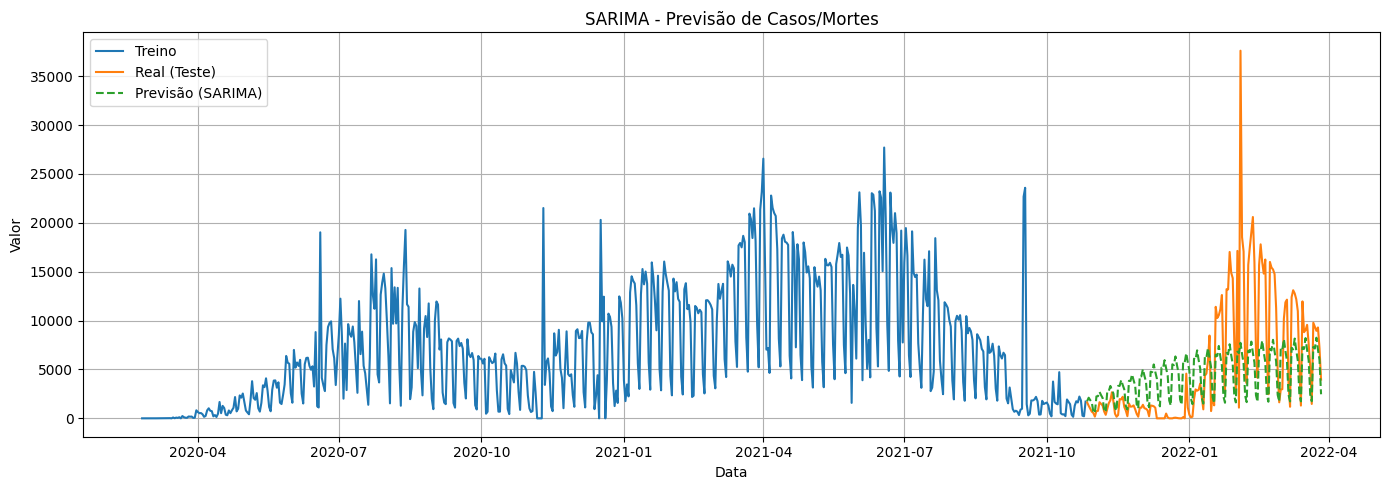

In [29]:
# Gráfico
plt.figure(figsize=(14,5))
plt.plot(df_train.index, df_train["y"], label="Treino")
plt.plot(df_test.index, df_test["y"], label="Real (Teste)")
plt.plot(y_pred.index, y_pred, label="Previsão (SARIMA)", linestyle="--")
plt.title("SARIMA - Previsão de Casos/Mortes")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
mae = mean_absolute_error(df_test["y"], y_pred)
rmse = root_mean_squared_error(df_test["y"], y_pred)
r2 = r2_score(df_test["y"], y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 3775.71
RMSE: 5264.52
R²: 0.31


In [35]:
y_avg = df_train["y"].mean()
y_pred_avg = [y_avg] * len(df_test)

mae_avg = mean_absolute_error(df_test["y"], y_pred_avg)
rmse_avg = root_mean_squared_error(df_test["y"], y_pred_avg)

print(f"MAE: {mae_avg:.2f}")
print(f"RMSE: {rmse_avg:.2f}")

MAE: 5836.47
RMSE: 6589.59


O gráfico apresenta a previsão de casos de COVID-19 no estado de São Paulo utilizando o modelo SARIMA, com comparação entre os dados reais do período de teste e as previsões geradas. O desempenho do modelo foi avaliado por meio das métricas MAE (erro absoluto médio), RMSE (raiz do erro quadrático médio) e R² (coeficiente de determinação). Os valores obtidos foram: MAE de 3.775, RMSE de 5.264 e R² de 0.31. Para contextualizar esses resultados, também foi calculado o erro que ocorreria ao utilizar a média dos dados de treinamento como previsão constante, resultando em MAE de 5.836 e RMSE de 6.589. Isso mostra que o modelo consegue capturar padrões relevantes da série, superando uma previsão ingênua baseada na média, com desempenho consideravelmente melhor.

Apesar disso, o R² obtido foi relativamente baixo. Isso ocorre porque o R² mede o quanto o modelo consegue explicar da variabilidade total da série, e no caso de séries como esta — altamente voláteis e com picos extremos —, mesmo previsões com erros absolutos baixos podem não representar bem a variação completa dos dados. Além disso, o SARIMA tende a suavizar as previsões, o que dificulta a captação de eventos fora da curva, como o pico abrupto de casos em fevereiro de 2022 causado pela variante Ômicron. Como esse tipo de evento não segue os padrões históricos e sazonais, ele escapa à capacidade de previsão do modelo, contribuindo para a redução do R². Ainda assim, o desempenho geral é satisfatório em períodos de comportamento mais estável, e a diferença entre os erros do modelo e os da média reforça que o SARIMA está de fato aprendendo com a estrutura da série. Para melhorar a performance, especialmente na previsão de picos, seria interessante combinar esse modelo com variáveis externas ou abordagens mais flexíveis.

# **Referências**

ALMEIDA, V. Q. R. Cenários e efeitos da pandemia causada pelo novo coronavírus SARS-CoV-2 no Amazonas: Análise e previsão de séries temporais com a biblioteca Prophet. 2021. Disponível em: https://github.com/vqrca/bootcamp_alura_projeto_3/tree/main?tab=readme-ov-file#dados. Acesso em: Março 2025.​

HANADA, S. Análise de séries temporais da COVID-19 no Brasil em 2020 e início de 2021. 2021. Disponível em: https://github.com/hanada-stephan/brazil_2020_covid_analysis. Acesso em: Março 2025.​

ISLAM, N. Comprehensive Guide to Time Series Data Analytics and Forecasting with Python. 2024. Disponível em: https://medium.com/@nomannayeem/comprehensive-guide-to-time-series-data-analytics-and-forecasting-with-python-2c82de2c8517. Acesso em: Março 2025.​

SANTOS, E. G. Análise de série temporal sobre os casos e óbitos de Covid-19 e criação de um modelo de previsão utilizando a biblioteca Facebook Prophet. 2021. Disponível em: https://github.com/EltonGS/bootcamp_datascience_projeto_3. Acesso em: Março 2025.​

BRASIL. Ministério da Saúde. Brasil inicia vacinação contra a Covid-19 com a Coronavac. Brasília, 2021. Disponível em: https://www.gov.br/saude/pt-br/assuntos/noticias/brasil-inicia-vacinacao-contra-a-covid-19-com-a-coronavac. Acesso em: 22 abr. 2024.

G1. Brasil tem maior média de mortes por Covid desde o início da pandemia. G1, 1 abr. 2021. Disponível em: https://g1.globo.com/bemestar/coronavirus/noticia/2021/04/01/brasil-tem-maior-media-de-mortes-por-covid-desde-o-inicio-da-pandemia.ghtml. Acesso em: 22 abr. 2024.

FOLHA DE S.PAULO. Brasil bate recorde de casos de Covid com avanço da Ômicron. Folha, 26 jan. 2022. Disponível em: https://www1.folha.uol.com.br/equilibrioesaude/2022/01/brasil-bate-recorde-de-casos-de-covid-com-avanco-da-omicron.shtml. Acesso em: 22 abr. 2024.

UOL. Vacinação em massa derruba mortes por Covid no Brasil. UOL, 20 ago. 2021. Disponível em: https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2021/08/20/vacinacao-diminui-casos-e-mortes-por-covid-no-brasil.htm. Acesso em: 22 abr. 2024.


In [22]:
#@title **Avaliação**
EDA_e_preprocessamento = 10 #@param {type:"slider", min:0, max:10, step:1}

Modelo_base = 10 #@param {type:"slider", min:0, max:10, step:1}

Revisao = 10 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao_geral = 10 #@param {type:"slider", min:0, max:10, step:1}








In [23]:
#@title **Nota Final**
nota = 0.4*EDA_e_preprocessamento + 0.2*Modelo_base + 0.2*Revisao + 0.2*Apresentacao_geral

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0


NameError: name 'Aluno5' is not defined